In [17]:
# coding: utf-8
# In[2]:
#Call required libraries
import numpy as np # Data manipulation
import pandas as pd # Dataframe manipulatio
import matplotlib.pyplot as plt # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler # For scaling dataset
from sklearn.cluster import KMeans #For clustering
# In[3]:
wh = pd.read_csv("2017.csv") #Read the dataset
wh

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
5                 Netherlands               6            7.377      7.427426   
6                      Canada               7            7.316      7.384403   
7                 New Zealand               8            7.314      7.379510   
8                      Sweden               9            7.284      7.344095   
9                   Australia              10            7.284      7.356651   
10                     Israel              11            7.213      7.279853   
11                 Costa Rica              12            7.079      7.168112   
12                    Austria              13            7.006      7.070670   
13              United States              14            6.993      7.074657   
14                    Ireland              15            6.977      7.043352   
15                    Germany              16            6.951      7.005382   
16                    Belgium              17            6.891      6.955821   
17                 Luxembourg              18            6.863      6.923686   
18             United Kingdom              19            6.714      6.783792   
19                      Chile              20            6.652      6.739251   
20       United Arab Emirates              21            6.648      6.722047   
21                     Brazil              22            6.635      6.725470   
22             Czech Republic              23            6.609      6.683862   
23                  Argentina              24            6.599      6.690085   
24                     Mexico              25            6.578      6.671149   
25                  Singapore              26            6.572      6.636723   
26                      Malta              27            6.527      6.598397   
27                    Uruguay              28            6.454      6.545906   
28                  Guatemala              29            6.454      6.566874   
29                     Panama              30            6.452      6.557131   
..                        ...             ...              ...           ...   
125          Congo (Kinshasa)             126            4.280      4.357811   
126                      Mali             127            4.190      4.269671   
127               Ivory Coast             128            4.180      4.275183   
128                  Cambodia             129            4.168      4.278518   
129                     Sudan             130            4.139      4.345747   
130                     Ghana             131            4.120      4.222707   
131                   Ukraine             132            4.096      4.185410   
132                    Uganda             133            4.081      4.195800   
133              Burkina Faso             134            4.032      4.124059   
134                     Niger             135            4.028      4.111947   
135                    Malawi             136            3.970      4.077479   
136                      Chad             137            3.936      4.034712   
137                  Zimbabwe             138            3.875      3.978700   
138                   Lesotho             139            3.808      4.044344   
139                    Angola             140            3.795      3.951642   
140               Afghanistan             141            3.794      3.873661   
141                  Botswana             142            3.766      3.874123   
142                     Benin             143            3.657      3.745784   
143                Mad

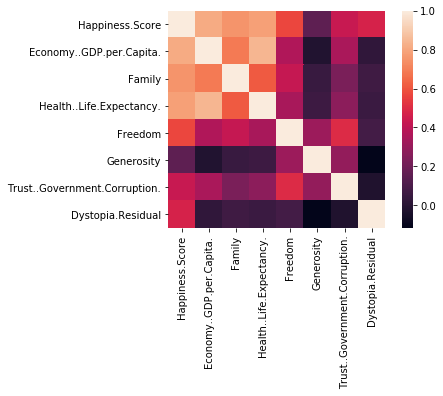

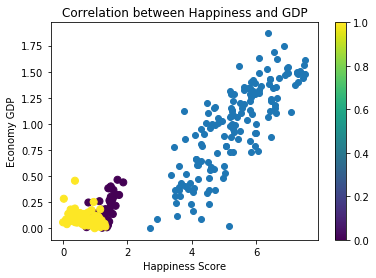

In [10]:
# coding: utf-8
# In[2]:
#Call required libraries
import numpy as np # Data manipulation
import pandas as pd # Dataframe manipulatio
import matplotlib.pyplot as plt # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler # For scaling dataset
from sklearn.cluster import KMeans #For clustering
# In[3]:
wh = pd.read_csv("2017.csv") #Read the dataset
wh
# In[4]:
wh1 = wh[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom',
'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map
# In[5]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(wh1)
# In[7]:
#K means Clustering
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)
clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)
# In[14]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                                  c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Trust Gov.Corruption')
plt.colorbar(scatter)
# In[11]:
happiness_score = wh1['Happiness.Score']
Economy_GDP = wh1['Economy..GDP.per.Capita.']
plt.scatter(happiness_score,Economy_GDP)
plt.title('Correlation between Happiness and GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Economy GDP')
plt.show()


In [11]:
import pandas as pd
import numpy as np
from itertools import combinations, groupby
from collections import Counter

# Sample data
orders = np.array([[1,'apple'], [1,'egg'], [1,'milk'], [2,'egg'], [2,'milk']], dtype=object)

# Generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    
    # For each order, generate a list of items in that order
    for order_id, order_object in groupby(orders, lambda x: x[0]):
        item_list = [item[1] for item in order_object]      
    
        # For each item list, generate item pairs, one at a time
        for item_pair in combinations(item_list, 2):
            yield item_pair                                      


# Counter iterates through the item pairs returned by our generator and keeps a tally of their occurrence
Counter(get_item_pairs(orders))

Counter({('apple', 'egg'): 1, ('apple', 'milk'): 1, ('egg', 'milk'): 2})

In [12]:
orders = pd.read_csv('order_products_prior.csv')
#print('orders -- dimensions: {0};   size: {1}'.format(orders.shape, size(orders)))
orders.head()

FileNotFoundError: File b'order_products_prior.csv' does not exist

In [13]:
orders = orders.set_index('order_id')['product_id'].rename('item_id')

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

In [14]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]      

In [5]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [15]:
%%time
rules = association_rules(orders, 0.01)


NameError: name 'association_rules' is not defined

In [16]:
item_name   = pd.read_csv('products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
rules_final

FileNotFoundError: File b'products.csv' does not exist